In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('creditcard.csv')
data.head(
)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe41249f970>,
 [Text(-0.005969650178434203, -1.09998380137016, '0'),
  Text(0.005969567707642693, 1.0999838018177286, '1')],
 [Text(-0.003256172824600474, -0.5999911643837235, '99.8%'),
  Text(0.003256127840532378, 0.5999911646278518, '0.2%')])

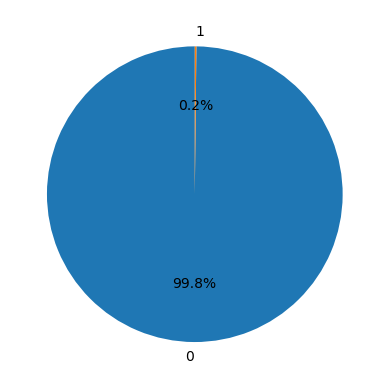

In [4]:
import matplotlib.pyplot as plt
value_counts = data['Class'].value_counts()
plt.pie(value_counts,labels=value_counts.index,autopct='%1.1f%%',startangle=90)

In [5]:
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
X = data.drop(columns=['Class','Amount','Time'])
y = data['Class']

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9996254813150287
Confusion Matrix:
 [[85301     6]
 [   26   110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.9482758620689655
Recall: 0.8088235294117647
F1-score: 0.873015873015873


In [9]:
y_pred_proba_svm = xgb_model.predict_proba(X_train)

thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_train, y_pred_threshold))

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.08080808080808081
مقدار F1 Score بهترین آستانه: 1.0


In [10]:
threshold = 0.08080808080808081

probabilities = xgb_model.predict_proba(X_test)

thresholded_predictions = (probabilities[:, 1] >= threshold).astype(int)

acc_thresholded = accuracy_score(y_test, thresholded_predictions)
conf_matrix_thresholded = confusion_matrix(y_test, thresholded_predictions)
class_report_thresholded = classification_report(y_test, thresholded_predictions)

precision_thresholded = precision_score(y_test, thresholded_predictions) 
recall_thresholded = recall_score(y_test, thresholded_predictions)
f1_thresholded = f1_score(y_test, thresholded_predictions)
print('Accuracy:', acc_thresholded)
print('Confusion Matrix:\n', conf_matrix_thresholded)
print('Classification Report:\n', class_report_thresholded)
print('Precision:', precision_thresholded)
print('Recall:', recall_thresholded)
print('F1-score:', f1_thresholded)

Accuracy: 0.9995903701883126
Confusion Matrix:
 [[85292    15]
 [   20   116]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.85      0.87       136

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.8854961832061069
Recall: 0.8529411764705882
F1-score: 0.8689138576779026


In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(f1_score(y_test, predictions))

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

[[85295    12]
 [   51    85]]
0.7296137339055795


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(f1_score(y_test, predictions))